In [1]:
import sys
from pathlib import Path
sys.path.append(str(Path.cwd().parent))

import seaborn as sns
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
from astropy import constants
from astropy.units import Quantity,Unit

In [2]:
from src import utils,physics,nsphere,run_units,plot
from src.distribution.distribution import Distribution
from src.distribution.nfw import NFW
from src.distribution.hernquist import Hernquist
from src.spatial_approximation import Lattice
from src.halo import Halo
from src.background import Mass_Distribution
from src.tqdm import tqdm

# Constants and general functions

In [3]:
dm_Mtot = Quantity(1.15e9,'Msun')
Rs = Quantity(1.18,'kpc')
c = 19
# dm_Mtot = Quantity(1.15e10,'Msun')
# Rs = Quantity(0.715,'kpc')
# c = 17
b_Mtot = Quantity(1e5,'Msun')
sigma = Quantity(50,'cm^2/gram')
# sigma = Quantity(20,'cm^2/gram')
# sigma = Quantity(0,'cm^2/gram')

dm_distribution = NFW(Rs=Rs,Rvir=Quantity(100,'kpc'),Mtot=dm_Mtot,particle_type='dm')
b_distribution = Hernquist(Rs=Rs,c=c,Mtot=b_Mtot,particle_type='baryon')

# Run

In [ ]:
dm_n_particles = 1e5
b_n_particles = 1e4
dt = dm_distribution.Tdyn / 1000
save_every_time = 10*dm_distribution.Tdyn
hard_save = True
save_path = 'run 1 sigma=50'

halo = Halo.setup(distributions=[dm_distribution,b_distribution],n_particles=[dm_n_particles,b_n_particles],dt=dt,hard_save=hard_save,
                  save_path=save_path,save_every_time=save_every_time,cleanup_nullish_particles=True,cleanup_particles_by_radius=True,
                  dynamics_params={'raise_warning':False},scatter_params={'kappa':0.02,'sigma':sigma})

In [5]:
# halo = Halo.load('run 2')

In [ ]:
halo.evolve(until_t=Quantity(14,'Gyr'))

In [9]:
halo.save()

In [12]:
halo.cleanup_nullish_particles = False
halo.cleanup_particles_by_radius = False

In [5]:
halo = Halo.load('run 1 sigma=50')
# halo = Halo.load('dual run')

ModuleNotFoundError: No module named 'src.density'

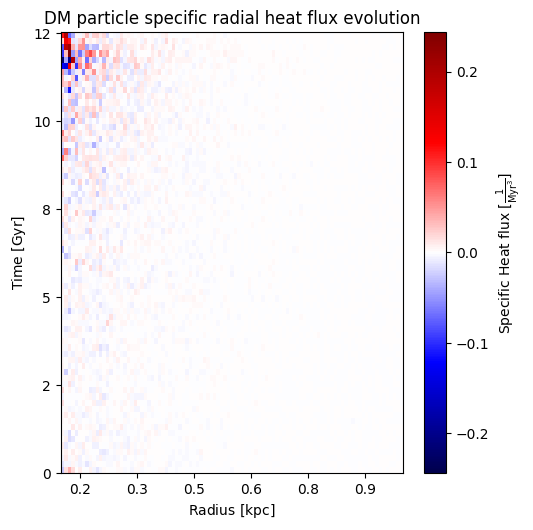

In [119]:
from matplotlib import colors
fig,ax = halo.plot_heat_flux_evolution(filter_particle_type='dm',time_units='Gyr',time_range=Quantity([0,14],'Gyr'),
                                       title='DM particle specific radial heat flux evolution',
                                       # radius_bins=Quantity(np.geomspace(1e-1, 1, 20), 'kpc'),
                                       radius_bins=Quantity(np.linspace(1e-1, 1, 100), 'kpc'),
                                       x_tick_format='%.1f',
                                       # norm = colors.TwoSlopeNorm(vmin=-0.1, vcenter=0, vmax=0.2),
                                       # norm = colors.TwoSlopeNorm(vmin=-0.05, vcenter=0, vmax=0.05),
                                       # norm = colors.TwoSlopeNorm(vmin=-0.01, vcenter=0, vmax=0.01),
                                       norm = colors.CenteredNorm(0),
                                       setup_kwargs={'figsize':(5,5)},
                                       # x_log=True,
                                       x_log=False,
                             )

(<Figure size 600x500 with 2 Axes>,
 <Axes: title={'center': 'DM particle temperature evolution'}, xlabel='Radius [$\\mathrm{kpc}$]', ylabel='Time [$\\mathrm{Gyr}$]'>)

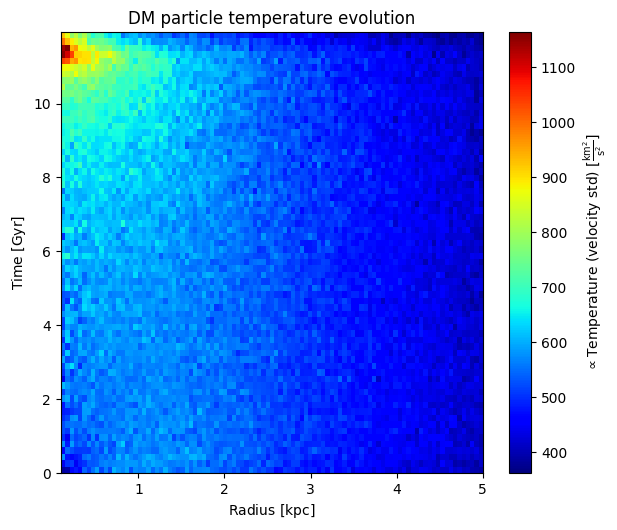

In [25]:
halo.plot_temperature_evolution(filter_particle_type='dm',include_now=False,time_units='Gyr',time_range=Quantity([0,12],'Gyr'),
                                radius_bins=Quantity(np.linspace(1e-1, 5, 100), 'kpc'),
                                title='DM particle temperature evolution')

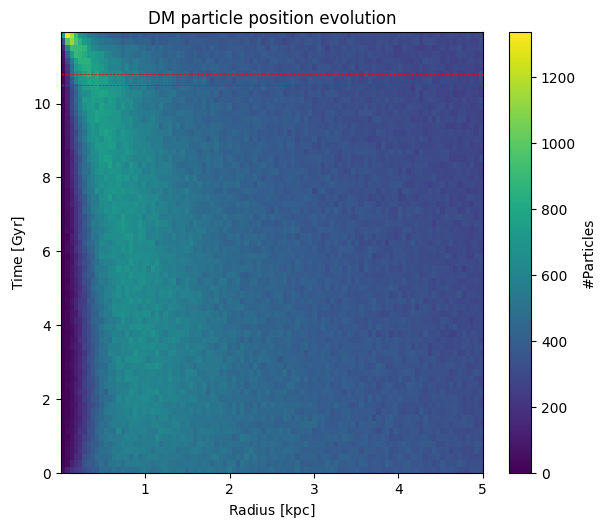

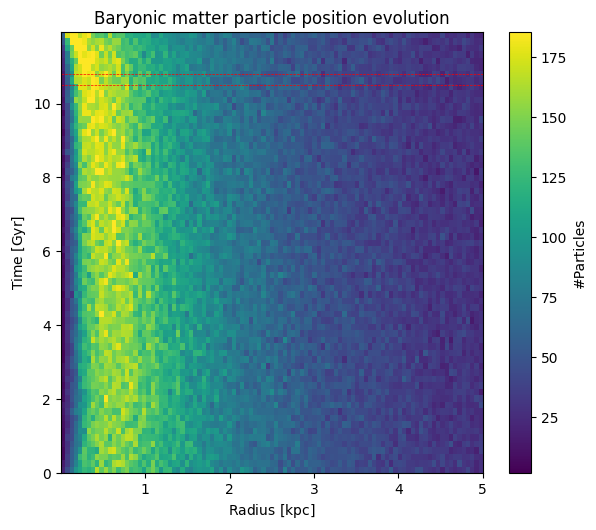

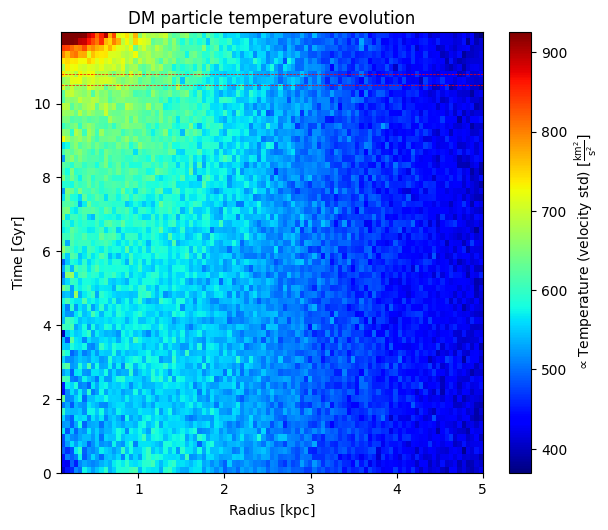

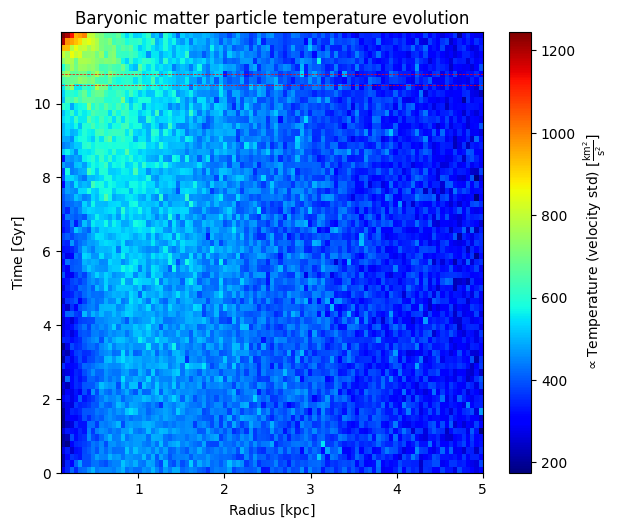

In [13]:
kwargs = {'hlines':[{'y':10.5, 'color':'red', 'linestyle':'--', 'linewidth':0.5},{'y':10.8, 'color':'red', 'linestyle':'--', 'linewidth':0.5}],
          'time_units':'Gyr','time_range':Quantity([0,12],'Gyr')}

fig,ax = halo.plot_particle_evolution(filter_particle_type='dm',title='DM particle position evolution',**kwargs)
# fig.savefig('../../DM particle position evolution.png',bbox_inches='tight')

fig,ax = halo.plot_particle_evolution(filter_particle_type='baryon',percentile_clip_scale=[0,99.5],
                                      title='Baryonic matter particle position evolution',**kwargs)
# fig.savefig('../../Baryonic matter particle position evolution.png',bbox_inches='tight')

fig,ax = halo.plot_temperature_evolution(filter_particle_type='dm',percentile_clip_scale=[0,99.9],
                                         title='DM particle temperature evolution',**kwargs)
# fig.savefig('../../DM particle temperature evolution.png',bbox_inches='tight')

fig,ax = halo.plot_temperature_evolution(filter_particle_type='baryon',percentile_clip_scale=[0,99.99],
                                         title='Baryonic matter particle temperature evolution',**kwargs)
# fig.savefig('../../Baryonic matter particle temperature evolution.png',bbox_inches='tight')

In [20]:
t = Quantity([10.5,13,16],'Gyr')
(340/(t*8*dm_density.Rs*dm_density.rho_s**(3/2)*np.sqrt(constants.G)*sigma)).to('')

<Quantity [1.09139399, 0.88151053, 0.7162273 ]>

Text(0.5, 1.0, 'Predicted collapse time')

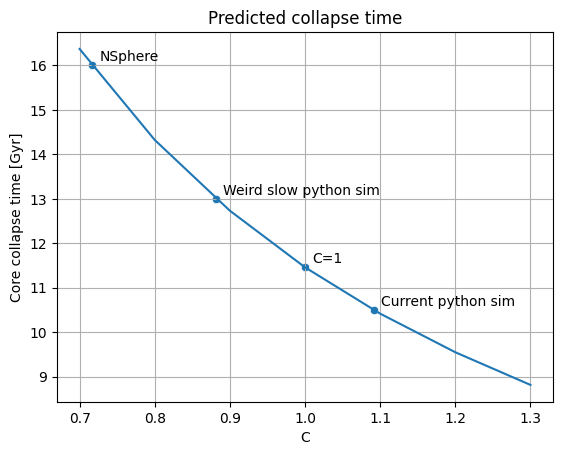

In [12]:
C = np.arange(0.7,1.3,0.1)
ax = sns.lineplot(x=C,y=(340/(8*C*dm_density.Rs*dm_density.rho_s**(3/2)*np.sqrt(constants.G)*sigma)).to('Gyr'))
plt.grid(True)

select_t = np.sort(np.hstack([Quantity([10.5,13,16],'Gyr'),(340/(8*dm_density.Rs*dm_density.rho_s**(3/2)*np.sqrt(constants.G)*sigma)).to('Gyr')]))
select_C = (340/(select_t*8*dm_density.Rs*dm_density.rho_s**(3/2)*np.sqrt(constants.G)*sigma)).to('')
sns.scatterplot(x=select_C,y=select_t,ax=ax)
ax.text(select_C[0].value+0.01,select_t[0].value+0.1,'Current python sim');
ax.text(select_C[1].value+0.01,select_t[1].value+0.1,'C=1');
ax.text(select_C[2].value+0.01,select_t[2].value+0.1,'Weird slow python sim');
ax.text(select_C[3].value+0.01,select_t[3].value+0.1,'NSphere');

ax.set_xlabel('C')
ax.set_ylabel('Core collapse time [Gyr]')
ax.set_title('Predicted collapse time')

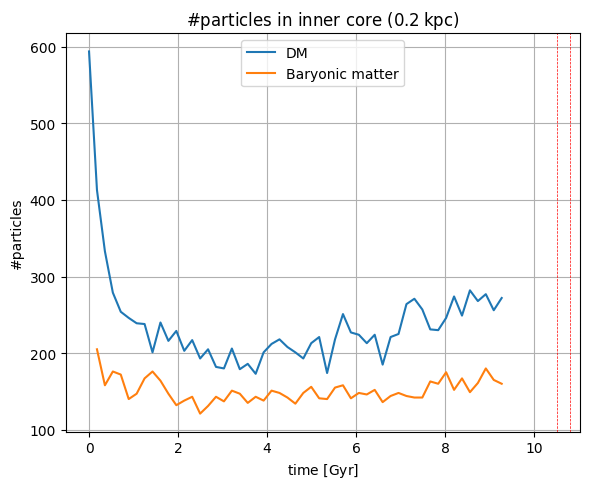

In [8]:
fig,ax = halo.plot_inner_core_density(filter_particle_type='dm',include_now=False,time_units='Gyr',label='DM');
halo.plot_inner_core_density(filter_particle_type='baryon',include_now=False,include_start=False,time_units='Gyr',ax=ax,fig=fig,label='Baryonic matter');
ax.axvline(x=10.5, color='red', linestyle='--', linewidth=0.5)
ax.axvline(x=10.8, color='red', linestyle='--', linewidth=0.5)

In [41]:
n_interactions = np.array([len(x) for x in halo.interactions_track])

In [103]:
n_interactions[:int(Quantity(10.5,'Gyr')/halo.dt)].sum()

np.int64(3678628)

In [104]:
n_interactions[int(Quantity(10.5,'Gyr')/halo.dt):int(Quantity(10.8,'Gyr')/halo.dt)].sum()

np.int64(9035136)

In [105]:
n_interactions[int(Quantity(10.8,'Gyr')/halo.dt):].sum()

np.int64(52977426)

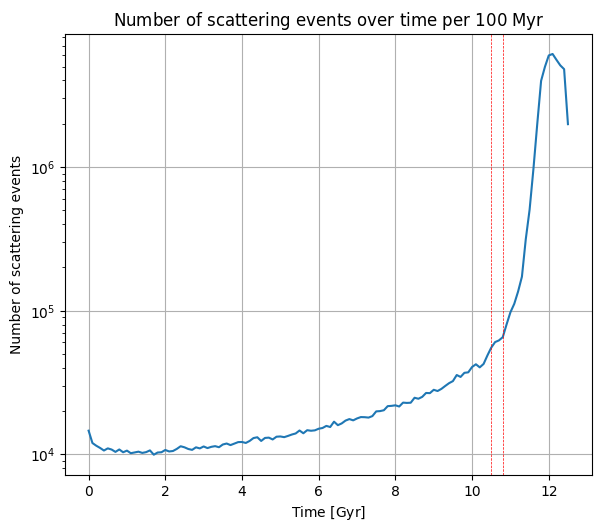

In [11]:
fig,ax = halo.plot_binned_scattering_amount_over_time(ax_set={'yscale':'log'})
ax.axvline(x=10.5, color='red', linestyle='--', linewidth=0.5)
ax.axvline(x=10.8, color='red', linestyle='--', linewidth=0.5)

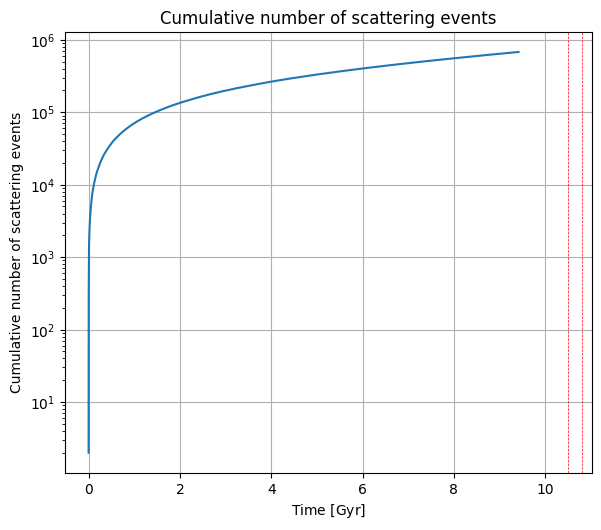

In [9]:
fig,ax = halo.plot_cumulative_scattering_amount_over_time(ax_set={'yscale':'log'},title='Cumulative number of scattering events')
ax.axvline(x=10.5, color='red', linestyle='--', linewidth=0.5)
ax.axvline(x=10.8, color='red', linestyle='--', linewidth=0.5)

In [51]:
nsphere_data.iloc[82]['cumulative_scatters']

np.float64(3680353.0)

In [49]:
(nsphere_data['time']-16000).abs().argmin()

np.int64(82)

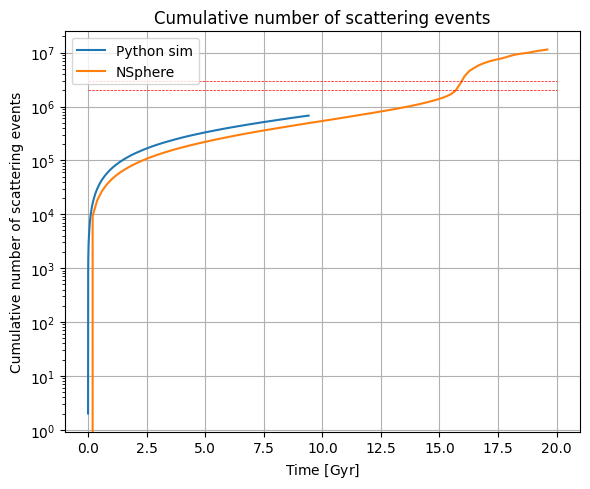

In [10]:
nsphere_data = nsphere.read_log('../../run_output.txt',append_zero=True)
fig,ax = halo.plot_cumulative_scattering_amount_over_time(ax_set={'yscale':'log'},title='Cumulative number of scattering events',label='Python sim')
plot.plot_cumulative_scattering_amount_over_time(nsphere_data['cumulative_scatters'],nsphere_data['time'],label='NSphere',ax=ax,fig=fig);
ax.hlines(y=[2e6,3e6],xmin=0,xmax=20,linestyles='--',colors='red',linewidth=0.5)

In [11]:
scatters = np.array([len(x) for x in halo.scatter_track])
x = (np.arange(len(scatters)) * halo.dt).to('Gyr')

<Axes: title={'center': 'Cumulative number of scattering events'}, xlabel='Time [$\\mathrm{Gyr}$]', ylabel='Cumulative number of scattering events'>

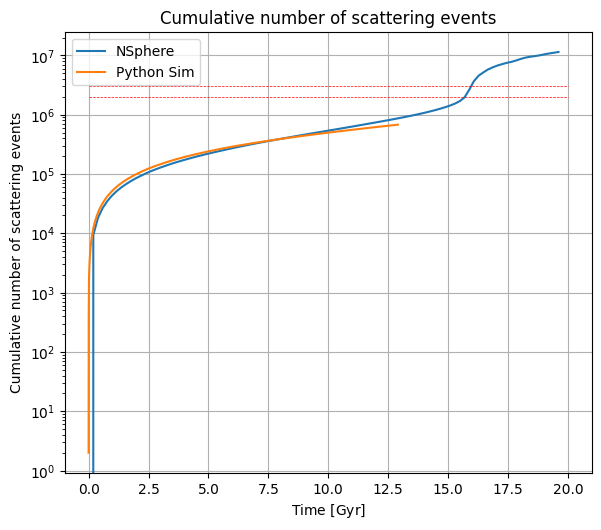

In [23]:
fig,ax = plot.plot_cumulative_scattering_amount_over_time(nsphere_data['cumulative_scatters'],nsphere_data['time'],label='NSphere',
                                                          ax_set={'yscale':'log'},title='Cumulative number of scattering events');
ax.hlines(y=[2e6,3e6],xmin=0,xmax=20,linestyles='--',colors='red',linewidth=0.5)
sns.lineplot(x=x*1.37, y=scatters.cumsum(), ax=ax, label='Python Sim')

In [13]:
radius_bins = Quantity(np.geomspace(1e-2, 50, 200), 'kpc')
velocity_bins = Quantity(np.linspace(0, 100, 200), 'km/second')
grid, extent = plot.aggregate_phase_space_data(data=halo.initial_particles, radius_bins=radius_bins, velocity_bins=velocity_bins)

r_distribution = grid.sum(axis=0)
r_distribution /= np.trapezoid(r_distribution,radius_bins[:-1])

(<Figure size 600x500 with 2 Axes>,
 <Axes: xlabel='Radius [$\\mathrm{kpc}$]', ylabel='Velocity [$\\mathrm{\\frac{km}{s}}$]'>)

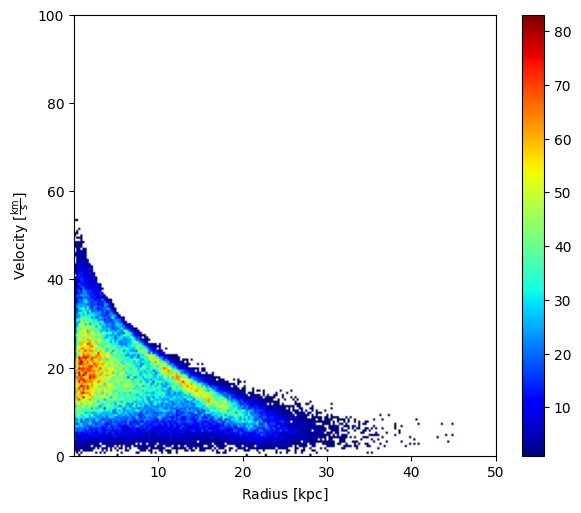

In [50]:
halo.plot_phase_space(halo.initial_particles)

In [10]:
den = NFW(Rs=Rs,Rvir=Quantity(10000,'kpc'),rho_s=dm_density.rho_s,Mtot=dm_Mtot,particle_type='dm')

In [154]:
den2 = NFW(Rs=Rs,Rvir=Quantity(50,'kpc'),Mtot=dm_Mtot,particle_type='dm')

In [155]:
r, v = np.meshgrid(Quantity(np.linspace(1e-2, 50, 200), 'kpc'),Quantity(np.linspace(0, 100, 200), 'km/second'))
grid_truncated = 16 * np.pi * r**2 * v**2 * dm_density.f(dm_density.E(r, v))
grid_untruncated = 16 * np.pi * r**2 * v**2 * den.f(den.E(r, v))
grid2 = 16 * np.pi * r**2 * v**2 * den2.f(den2.E(r, v))

In [124]:
r_array = Quantity(np.linspace(1e-2, 50, 200), 'kpc')
# Es = Quantity([Quantity(0,run_units.specific_energy),dm_density.Psi_grid[-90],dm_density.Psi_grid[-120]])
Es = Quantity([0,170,240],'km^2/second^2')
v_arrays = 2*(dm_density.Psi_interpolate(r_array)-np.expand_dims(Es,1))
v_arrays[v_arrays < 0] = np.nan
v_arrays = np.sqrt(v_arrays).to('km/second')

Text(18, 5, 'E=240 km2 / s2')

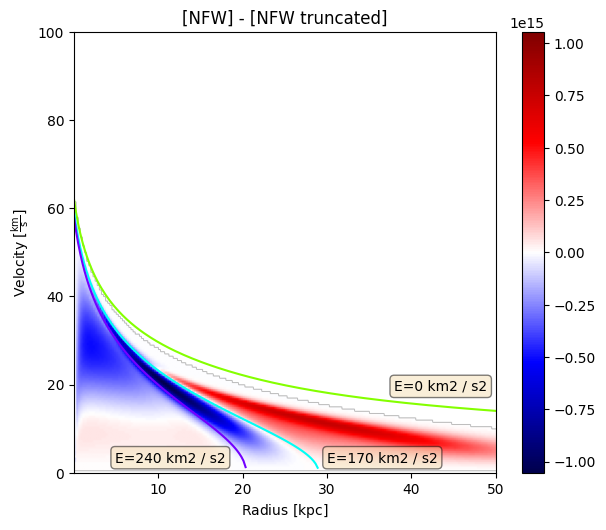

In [156]:
from matplotlib import colors
fig,ax = plot.plot_phase_space(
    grid_untruncated-grid_truncated,
    Quantity(np.linspace(1e-2, 50, 200), 'kpc'),
    Quantity(np.linspace(0, 100, 200), 'km/second'),
    velocity_units='km/second', cmap='seismic', transparent_value=0,
    norm=colors.CenteredNorm(0),
    title='[NFW] - [NFW truncated]'
)

color_palette = sns.color_palette('hsv', len(v_arrays))

for i,v_array in enumerate(v_arrays):
    sns.lineplot(x=r_array,y=v_array,ax=ax,color=color_palette[i])

ax.text(s=f'E={Es[0].to('km^2/second^2'):.0f}',**utils.drop_None(**plot.pretty_ax_text(x=49,y=18,verticalalignment='bottom',
                                                                                       horizontalalignment='right')))
ax.text(s=f'E={Es[1].to('km^2/second^2'):.0f}',**utils.drop_None(**plot.pretty_ax_text(x=30,y=5)))
ax.text(s=f'E={Es[2].to('km^2/second^2'):.0f}',**utils.drop_None(**plot.pretty_ax_text(x=18,y=5,horizontalalignment='right')))

In [4]:
r, v = np.meshgrid(Quantity(np.linspace(1e-2, 50, 200), 'kpc'),Quantity(np.linspace(0, 100, 200), 'km/second'))
grid_truncated = 16 * np.pi * r**2 * v**2 * dm_density.f(dm_density.E(r, v))

In [5]:
Rvirs = Quantity([40,50,75,100,10000],'kpc')
# distributions = [NFW(Rs=Rs,Rvir=Rvir,rho_s=dm_density.rho_s,Mtot=dm_Mtot,particle_type='dm') for Rvir in Rvirs]
distributions = [NFW(Rs=Rs,Rvir=Rvir,Mtot=dm_Mtot,particle_type='dm') for Rvir in Rvirs]

In [7]:
from matplotlib import colors
from matplotlib.backends.backend_agg import FigureCanvasAgg
from PIL import Image

distributions = [NFW(Rs=Rs,Rvir=Rvir,Mtot=dm_Mtot,particle_type='dm') for Rvir in Rvirs]
plot.save_images(images=plot.to_images(iterator=distributions+[dm_density],plot_fn=lambda distribution:plot.plot_phase_space(
    16 * np.pi * r**2 * v**2 * distribution.f(distribution.E(r, v)),
    Quantity(np.linspace(1e-2, 50, 200), 'kpc'),
    Quantity(np.linspace(0, 100, 200), 'km/second'),
    velocity_units='km/second', cmap='jet', transparent_value=0,
    title=rf'Truncation with $R_\mathrm{{vir}}={distribution.Rvir.value:.1f}\ [\mathrm{{{distribution.Rvir.unit}}}]$'
)),
                 save_path='../../NFW truncation effect unfixed rho_s.gif', duration = 1000)

  0%|          | 0/6 [00:00<?, ?it/s]

In [8]:
from matplotlib import colors
from matplotlib.backends.backend_agg import FigureCanvasAgg
from PIL import Image

distributions = [NFW(Rs=Rs,Rvir=Rvir,rho_s=dm_density.rho_s,Mtot=dm_Mtot,particle_type='dm') for Rvir in Rvirs]
plot.save_images(images=plot.to_images(iterator=distributions+[dm_density],plot_fn=lambda distribution:plot.plot_phase_space(
    16 * np.pi * r**2 * v**2 * distribution.f(distribution.E(r, v)),
    Quantity(np.linspace(1e-2, 50, 200), 'kpc'),
    Quantity(np.linspace(0, 100, 200), 'km/second'),
    velocity_units='km/second', cmap='jet', transparent_value=0,
    title=rf'Truncation with $R_\mathrm{{vir}}={distribution.Rvir.value:.1f}\ [\mathrm{{{distribution.Rvir.unit}}}]$'
)),
                 save_path='../../NFW truncation effect fixed rho_s.gif', duration = 1000)

  0%|          | 0/6 [00:00<?, ?it/s]

In [10]:
from matplotlib import colors
from matplotlib.backends.backend_agg import FigureCanvasAgg
from PIL import Image

distributions = [Hernquist(Rs=Rs,Rvir=Rvir,Mtot=dm_Mtot,particle_type='dm') for Rvir in Rvirs]
plot.save_images(images=plot.to_images(iterator=distributions,plot_fn=lambda distribution:plot.plot_phase_space(
    16 * np.pi * r**2 * v**2 * distribution.f(distribution.E(r, v)),
    Quantity(np.linspace(1e-2, 50, 200), 'kpc'),
    Quantity(np.linspace(0, 100, 200), 'km/second'),
    velocity_units='km/second', cmap='jet', transparent_value=0,
    title=rf'Truncation with $R_\mathrm{{vir}}={distribution.Rvir.value:.1f}\ [\mathrm{{{distribution.Rvir.unit}}}]$'
)),
                 save_path='../../Hernquist truncation effect unfixed rho_s.gif', duration = 1000)

  0%|          | 0/6 [00:00<?, ?it/s]

Text(18, 5, 'E=240 km2 / s2')

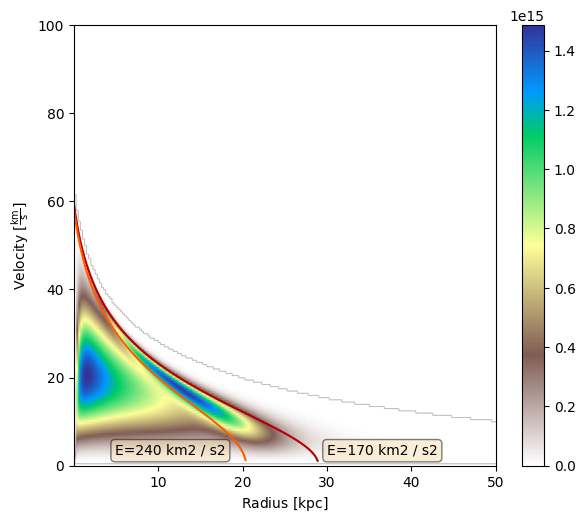

In [153]:
fig,ax = dm_density.plot_phase_space(cmap='terrain_r')
color_palette = sns.color_palette('hot', len(v_arrays))

for i,v_array in enumerate(v_arrays[1:]):
    sns.lineplot(x=r_array,y=v_array,ax=ax,color=color_palette[i])
ax.text(s=f'E={Es[1].to('km^2/second^2'):.0f}',**utils.drop_None(**plot.pretty_ax_text(x=30,y=5)))
ax.text(s=f'E={Es[2].to('km^2/second^2'):.0f}',**utils.drop_None(**plot.pretty_ax_text(x=18,y=5,horizontalalignment='right')))

(<Figure size 1000x500 with 1 Axes>,
 <Axes: title={'center': 'Particle range distribution (pdf)'}, xlabel='Radius [$\\mathrm{kpc}$]', ylabel='Density'>)

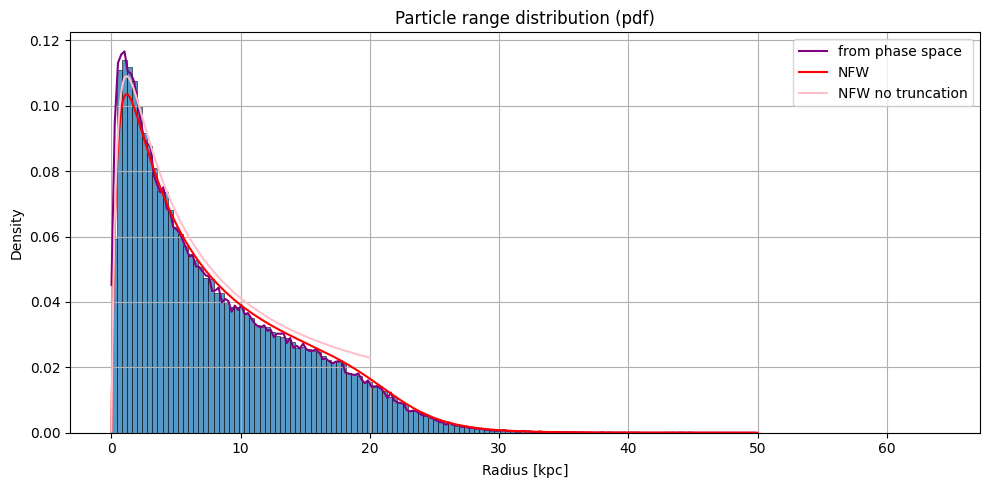

In [16]:
fig,ax = halo.plot_r_distribution(halo.initial_particles,figsize=(10,5),add_density=None)

sns.lineplot(x=radius_bins[:-1],y=r_distribution,ax=ax,color='purple',label='from phase space')

ax.legend()

dm_density.plot_radius_distribution(r_start=Quantity(1e-3,'kpc'),r_end=Quantity(50,'kpc'),fig=fig,ax=ax,label='NFW',add_markers=False)
den.plot_radius_distribution(r_start=Quantity(1e-3,'kpc'),r_end=Quantity(20,'kpc'),fig=fig,ax=ax,
                             label='NFW no truncation',add_markers=False,color='pink')

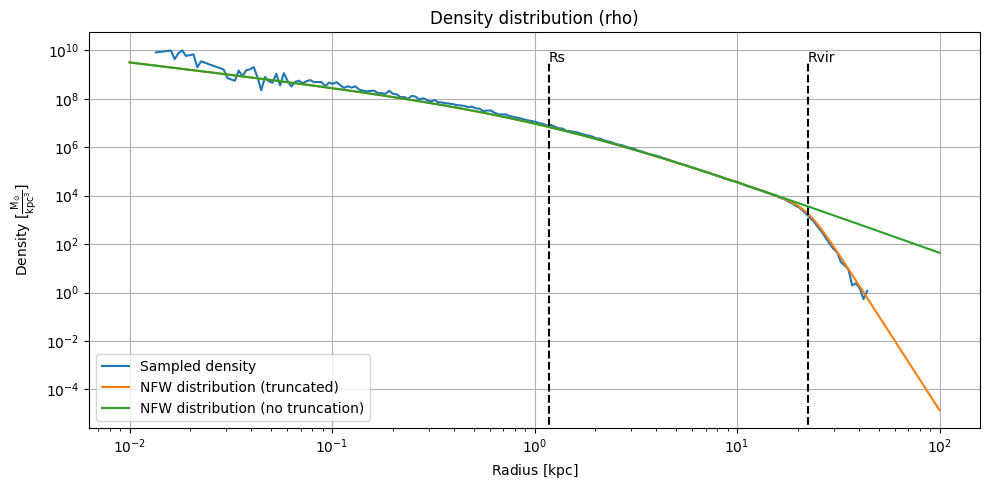

In [26]:
r_bin_volume = 4 / 3 * np.pi * (radius_bins[1:] ** 3 - radius_bins[:-1] ** 3)
sampled_density = grid.sum(axis=0)*halo.m.max()/r_bin_volume

fig,ax = plot.setup_plot(figsize=(10,5),ax_set={'xscale':'log','yscale':'log'},xlabel=utils.add_label_unit('Radius','kpc'),
                         ylabel=utils.add_label_unit('Density',Unit('Msun/kpc^3')))

sns.lineplot(x=radius_bins[:-1][sampled_density!=0],y=sampled_density[sampled_density!=0],label='Sampled density')
dm_density.plot_rho(fig=fig,ax=ax,label='NFW distribution (truncated)',r_start=Quantity(1e-2,'kpc'),r_end=Quantity(1e2,'kpc'));
den.plot_rho(fig=fig,ax=ax,label='NFW distribution (no truncation)',r_start=Quantity(1e-2,'kpc'),r_end=Quantity(1e2,'kpc'),
             add_markers=False);

# ax.set(xscale='linear')

In [ ]:
halo.plot_densities_over_time();

### Compare underestimate scattering rates

In [ ]:
halo = Halo.load('run 3')

In [5]:
data = halo.get_particle_states().to_pandas()

In [6]:
nsphere_all_data,nsphere_initial_data,nsphere_unit_mass = nsphere.prepare_for_plotting(nsphere.load_all_files(
    base_filename='Rank_Mass_Rad_VRad_unsorted',ntimesteps=12525000,tfinal=1100,
    max_time=Quantity(19.605,'Gyr'),root_path='../../NSphere-SIDM/data/SIDM run'))

Load files: 100%|███████████████████████████████████████████████████████| 501/501 [00:02<00:00, 204.78it/s]


In [110]:
agg_data = data.groupby('time').apply(
    lambda group:physics.sidm.scatter_underestimate_shortcut(
        group['r'],group['vx'],group['vy'],group['vr'],halo.dt,group['m'],sigma=halo.scatter_params['sigma'],
        max_radius_j=halo.scatter_params['max_radius_j'],kappa=halo.scatter_params['kappa'],
        max_allowed_rounds=halo.scatter_params['max_allowed_rounds']),
    include_groups=False)

agg_data2 = data.groupby('time').apply(
    lambda group:physics.sidm.scatter_underestimate_shortcut(
        group['r'],group['vx'],group['vy'],group['vr'],halo.dt,group['m'],sigma=halo.scatter_params['sigma'],
        max_radius_j=halo.scatter_params['max_radius_j'],kappa=halo.scatter_params['kappa'],
        max_allowed_rounds=halo.scatter_params['max_allowed_rounds']*5),
    include_groups=False)

agg_data3 = data.groupby('time').apply(
    lambda group:physics.sidm.scatter_underestimate_shortcut(
        group['r'],group['vx'],group['vy'],group['vr'],halo.dt,group['m'],sigma=halo.scatter_params['sigma'],
        max_radius_j=halo.scatter_params['max_radius_j'],kappa=halo.scatter_params['kappa'],
        max_allowed_rounds=halo.scatter_params['max_allowed_rounds']*10),
    include_groups=False)

agg_data4 = data.groupby('time').apply(
    lambda group:physics.sidm.scatter_underestimate_shortcut(
        group['r'],group['vx'],group['vy'],group['vr'],halo.dt,group['m'],sigma=halo.scatter_params['sigma'],
        max_radius_j=halo.scatter_params['max_radius_j'],kappa=halo.scatter_params['kappa']/10,
        max_allowed_rounds=halo.scatter_params['max_allowed_rounds']*10),
    include_groups=False)

In [96]:
n = []
t = []
for time,group in tqdm(nsphere_all_data.groupby('time')):
    group = group.sort_values('r')
    t += [time]
    n += [physics.sidm.scatter_underestimate_shortcut(
        group['r'],*utils.split_2d(group['vp'],acos=False),group['vr'],Quantity(0.00178,'Myr'),np.full(len(group),dm_Mtot/len(group)),
        sigma=Quantity(50,'cm^2/gram').to(run_units.cross_section),max_radius_j=10,kappa=halo.scatter_params['kappa'],max_allowed_rounds=1)]
agg_data_nsphere = pd.Series(n,index=t)

  0%|          | 0/501 [00:00<?, ?it/s]

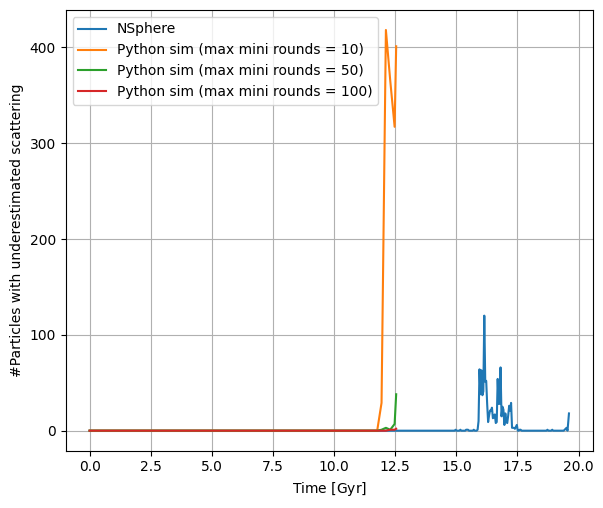

In [112]:
fig,ax = plot.setup_plot(xlabel=utils.add_label_unit('Time','Gyr'),ylabel='#Particles with underestimated scattering')
sns.lineplot(x=Quantity(agg_data_nsphere.index,'Gyr').to('Gyr'),y=np.array(agg_data_nsphere),ax=ax,label='NSphere')
sns.lineplot(x=Quantity(agg_data.index,'Myr').to('Gyr'),y=np.array(agg_data),ax=ax,label='Python sim (max mini rounds = 10)')
sns.lineplot(x=Quantity(agg_data2.index,'Myr').to('Gyr'),y=np.array(agg_data2),ax=ax,label='Python sim (max mini rounds = 50)')
sns.lineplot(x=Quantity(agg_data3.index,'Myr').to('Gyr'),y=np.array(agg_data3),ax=ax,label='Python sim (max mini rounds = 100)')
ax.legend()

## Background run

In [144]:
b_n_particles = 1e4
dt = dm_density.Tdyn / 1000
save_every_time = Quantity(100,'Myr')

halo = Halo.setup(densities=[b_density],n_particles=[b_n_particles],particle_types=['baryon'],dt=dt,Tdyn=dm_density.Tdyn,
                  save_every_time=save_every_time,dynamics_params={'grid_window_radius':50,'max_minirounds':50},
                  background=Mass_Distribution.from_files(Mtot=dm_Mtot,base_filename='Rank_Mass_Rad_VRad_unsorted',ntimesteps=12525000,tfinal=1100,
                                                          max_time=Quantity(19.605,'Gyr'),root_path='../../NSphere-SIDM/data/SIDM run'))

In [106]:
nsphere_all_data,nsphere_initial_data,nsphere_unit_mass = nsphere.prepare_for_plotting(nsphere.load_all_files(**halo.background.load_kwargs))

Load files: 100%|███████████████████████████████████████████████████████| 501/501 [00:02<00:00, 218.49it/s]


In [145]:
halo.evolve(t=Quantity(17,'Gyr'))

100%|███████████████████████████████████████████████████████████| 953913/953913 [1:06:20<00:00, 239.63it/s]


In [146]:
halo.save('run without any background')

In [37]:
np.abs(nsphere_all_data['time'].unique()-1.5).argmin()
# nsphere_all_data['time'].unique()[434]

np.int64(38)

In [156]:
halo = Halo.load('run with background')
# halo = Halo.load('run without any background')

In [162]:
from matplotlib.colors import LogNorm

In [179]:
time_range = Quantity([2,17],'Gyr')
# bins = Quantity(np.geomspace(1e-3,1e3,100),'kpc')
r_bins = Quantity(np.linspace(1e-3,5,100),'kpc')
density_units = run_units.density

sub = halo.snapshots[(halo.snapshots['time'] >= time_range[0])*(halo.snapshots['time'] <= time_range[1])]
r_bin_volume = 4 / 3 * np.pi * (r_bins[1:] ** 3 - r_bins[:-1] ** 3)
grid = np.empty((len(np.unique(sub['time'])),len(r_bins)-1),dtype=np.float64)
for i,group in enumerate(sub.group_by('time').groups):
    counts,_ = np.histogram(group['r'], bins=r_bins)
    density = (counts / r_bin_volume * halo.m[0]).to(density_units)
    # grid[i] = density
    grid[i] = counts
extent = (r_bins.min(),r_bins.max(),sub['time'].min(),sub['time'].max())

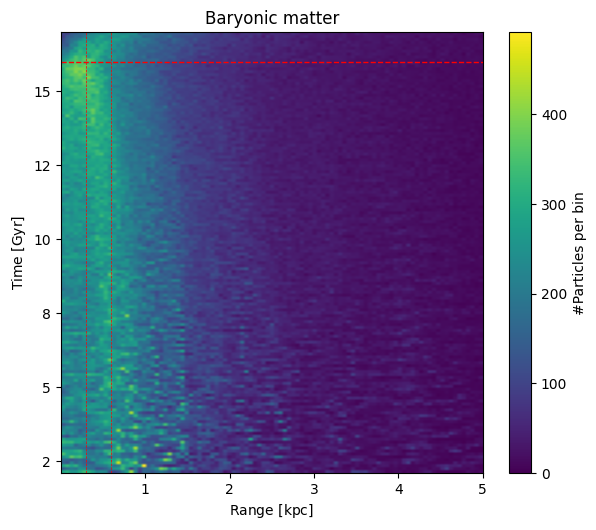

In [180]:
length_units = 'kpc'
time_units='Gyr'
xlabel = 'Range'
ylabel = 'Time'
cbar_label = '#Particles per bin'
kwargs = {}
fig,ax = plot.plot_2d(
    grid=grid,
    extent=extent,
    x_units=length_units,
    y_units=time_units,
    xlabel=utils.add_label_unit(xlabel, length_units),
    ylabel=utils.add_label_unit(ylabel, time_units),
    cbar_label=cbar_label,
    # title='Baryonic matter no DM background',
    title='Baryonic matter',
    **kwargs,
)
ax.axhline(y=16, color='red', linestyle='--', linewidth=1)
ax.axvline(x=0.3, color='red', linestyle='--', linewidth=0.5)
ax.axvline(x=0.6, color='red', linestyle='--', linewidth=0.5)

In [150]:
from astropy import table
time_range = Quantity([2,17],'Gyr')
# bins = Quantity(np.geomspace(1e-3,1e3,100),'kpc')
r_bins = Quantity(np.linspace(1e-3,5,100),'kpc')
density_units = run_units.density

nsphere_length_units = 'kpc'
nsphere_time_units = 'Gyr'

sub = nsphere_all_data[nsphere_all_data['time'].between(*time_range.to(nsphere_time_units).value)]
r_bin_volume = 4 / 3 * np.pi * (r_bins[1:] ** 3 - r_bins[:-1] ** 3)
grid = np.empty((len(np.unique(sub['time'])),len(r_bins)-1),dtype=np.float64)
for i,(time,group) in enumerate(sub.groupby('time')):
    counts,_ = np.histogram(Quantity(group['r'],nsphere_length_units), bins=r_bins.to(nsphere_length_units))
    density = (counts / r_bin_volume * halo.m[0]).to(density_units)
    grid[i] = counts
extent = (r_bins.min(),r_bins.max(),Quantity(sub['time'].min(),nsphere_time_units),Quantity(sub['time'].max(),nsphere_time_units))

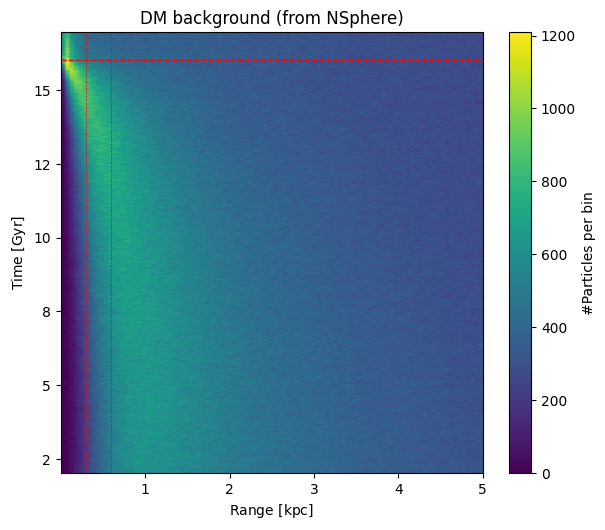

In [152]:
length_units = 'kpc'
time_units='Gyr'
xlabel = 'Range'
ylabel = 'Time'
cbar_label = '#Particles per bin'
kwargs = {}
fig,ax = plot.plot_2d(
    grid=grid,
    extent=extent,
    x_units=length_units,
    y_units=time_units,
    xlabel=utils.add_label_unit(xlabel, length_units),
    ylabel=utils.add_label_unit(ylabel, time_units),
    cbar_label=cbar_label,
    title='DM background (from NSphere)',
    **kwargs,
)
ax.axhline(y=16, color='red', linestyle='--', linewidth=1)
ax.axvline(x=0.3, color='red', linestyle='--', linewidth=0.5)
ax.axvline(x=0.6, color='red', linestyle='--', linewidth=0.5)

In [25]:
group['r']

<MaskedQuantity [1.83906748e-03, 2.56875821e-03, 3.67267662e-03, ...,
                 2.63307112e+01, 2.64852304e+01, 2.69096327e+01] kpc>

In [33]:
np.argmin(np.abs(np.unique(halo.snapshots['time'])-Quantity(1.5,'Gyr')))

np.int64(14)

In [40]:
x = halo.snapshots[halo.snapshots['time'] == np.unique(halo.snapshots['time'])[14]]
y = halo.snapshots[halo.snapshots['time'] == np.unique(halo.snapshots['time'])[164]]
data = pd.DataFrame({'initial':np.array(halo.initial_particles.to_pandas().sort_values('particle_index')['r']).astype(np.float64),
                     'max core':np.array(x.to_pandas().sort_values('particle_index')['r']).astype(np.float64),
                     'collapse':np.array(y.to_pandas().sort_values('particle_index')['r']).astype(np.float64)})

data.to_csv('baryonic all positions.csv',index=False)
times = Quantity([Quantity(0,'Myr'),x['time'][0],y['time'][0]]).to('Gyr')

In [50]:
x = nsphere_all_data[nsphere_all_data['time'] == np.unique(nsphere_all_data['time'])[38]]
y = nsphere_all_data[nsphere_all_data['time'] == np.unique(nsphere_all_data['time'])[383]]

data = pd.DataFrame({'initial':np.array(nsphere_initial_data.sort_values('particle_index')['r']),
                     'max core':np.array(x.sort_values('particle_index')['r']),
                     'collapse':np.array(y.sort_values('particle_index')['r'])})
data.to_csv('DM all positions.csv',index=False)
times = Quantity([0,x['time'].iloc[0],y['time'].iloc[0]],'Gyr')

In [51]:
import pandas as pd
import numpy as np

data = pd.read_csv('baryonic all positions.csv')
unit_mass = 1e5/1e4
bins = np.geomspace(1e-3,1e3,100)

def process(r,bins,unit_mass):
    counts, bin_edges = np.histogram(r, bins=bins)
    histogram_bins = np.array(list(zip(bin_edges, bin_edges[1:])))
    bin_centers = histogram_bins.mean(1)
    volume = 4 / 3 * np.pi * (histogram_bins[:, 1] ** 3 - histogram_bins[:, 0] ** 3)
    density = (counts / volume * unit_mass)
    return pd.DataFrame({'bin_centers':bin_centers,'volume':volume,'counts':counts,'density':density})

binned_data = pd.concat([process(data[column],bins,unit_mass).rename(columns={'counts':f'{column} counts','density':f'{column} density'})
                         for column in data],axis=1)
binned_data = binned_data.loc[:,~binned_data.columns.duplicated()].copy()
binned_data.to_csv('baryonic binned data.csv',index=False)

In [52]:
import pandas as pd
import numpy as np

data = pd.read_csv('DM all positions.csv')
unit_mass = 1.15e9/1e5
bins = np.geomspace(1e-3,1e3,100)

def process(r,bins,unit_mass):
    counts, bin_edges = np.histogram(r, bins=bins)
    histogram_bins = np.array(list(zip(bin_edges, bin_edges[1:])))
    bin_centers = histogram_bins.mean(1)
    volume = 4 / 3 * np.pi * (histogram_bins[:, 1] ** 3 - histogram_bins[:, 0] ** 3)
    density = (counts / volume * unit_mass)
    return pd.DataFrame({'bin_centers':bin_centers,'volume':volume,'counts':counts,'density':density})

binned_data = pd.concat([process(data[column],bins,unit_mass).rename(columns={'counts':f'{column} counts','density':f'{column} density'})
                         for column in data],axis=1)
binned_data = binned_data.loc[:,~binned_data.columns.duplicated()].copy()
binned_data.to_csv('DM binned data.csv',index=False)

In [34]:
initial = halo.initial_particles.to_pandas()
snapshots = halo.snapshots.to_pandas()
now = halo.particles.to_pandas()

pd.concat([initial,snapshots,now],ignore_index=True).drop(columns='step').to_csv('Baryonic particles.csv')

In [42]:
x = nsphere_all_data.drop(columns=['rank','mass','PsiA','L','T'])

In [43]:
x.to_pickle('dm particles.pkl')

Text(0.5, 1.0, 'Baryonic matter radius distribution')

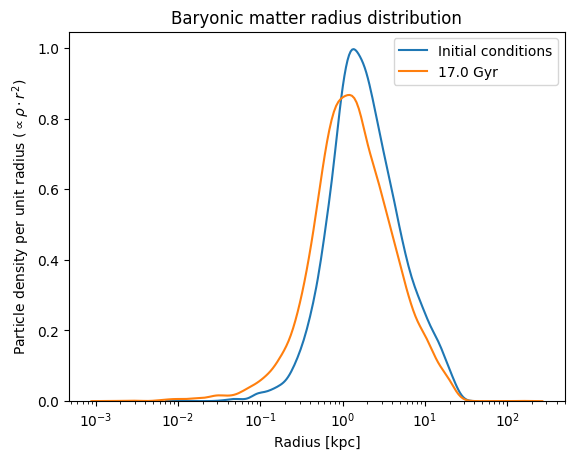

In [51]:
ax = sns.kdeplot(np.array(halo.initial_particles['r']).astype(np.float64),log_scale=True,label='Initial conditions')
sns.kdeplot(halo.particles['r'],log_scale=True,ax=ax,label=f'{halo.time.to('Gyr'):.1f}')
ax.legend()
ax.set_xlabel('Radius [kpc]')
ax.set_ylabel(r'Particle density per unit radius ($\propto \rho\cdot r^2$)')
ax.set_title('Baryonic matter radius distribution')

(0.01, 30.0)

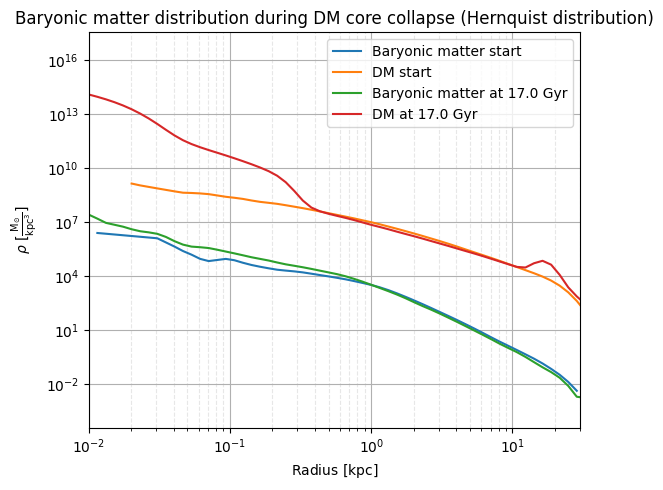

In [29]:
bins = Quantity(np.geomspace(1e-3,1e3,100),'kpc')
fig,ax = plot.plot_density(halo.initial_particles['r'],label='Baryonic matter start',unit_mass=halo.m[0],bins=bins)
fig,ax = plot.plot_density(Quantity(nsphere_initial_data['r'],'kpc'),label='DM start',unit_mass=nsphere_unit_mass,bins=bins,fig=fig,ax=ax)
fig,ax = plot.plot_density(halo.particles['r'],fig=fig,ax=ax,label=f'Baryonic matter at {halo.time.to('Gyr'):.1f}',bins=bins,unit_mass=halo.m[0])
fig,ax = plot.plot_density(Quantity(nsphere_all_data[nsphere_all_data['save_step']==869],'kpc'),label='DM at 17.0 Gyr',unit_mass=nsphere_unit_mass,
                           bins=bins,fig=fig,ax=ax,title='Baryonic matter distribution during DM core collapse (Hernquist distribution)')
ax.set_xlim([1e-2,0.3e2])

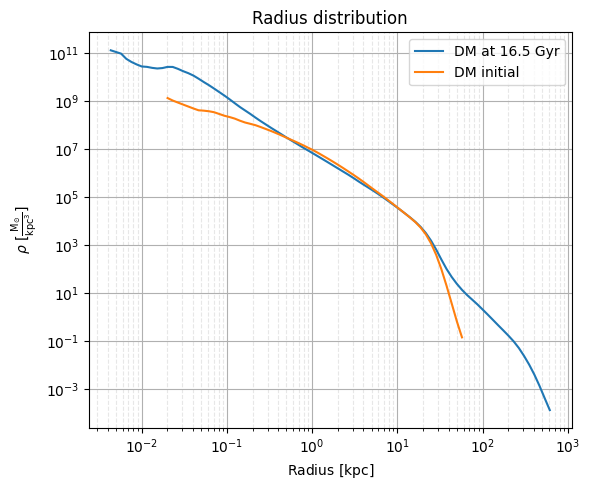

In [7]:
t = Quantity(nsphere_all_data[nsphere_all_data['save_step'] == 845]['time'].iloc[0],'Gyr')
fig,ax = plot.plot_density(Quantity(nsphere_all_data[nsphere_all_data['save_step'] == 845]['r'],'kpc'),label=f'DM at {t:.1f}',
                           unit_mass=nsphere_unit_mass,bins=Quantity(np.geomspace(1e-3,1e3,100),'kpc'))
fig,ax = plot.plot_density(Quantity(nsphere_initial_data['r'],'kpc'),label='DM initial',unit_mass=nsphere_unit_mass,
                           bins=Quantity(np.geomspace(1e-3,1e3,100),'kpc'),fig=fig,ax=ax)

In [8]:
data = nsphere.to_saved_state_like(nsphere.load_all_files(base_filename='Rank_Mass_Rad_VRad_unsorted',ntimesteps=12525000,tfinal=1100,
                                                          max_time=19.605*Gyr,root_path='../../NSphere-SIDM/data'))

Load files: 100%|███████████████████████████████████████████████████████| 501/501 [00:01<00:00, 346.59it/s]


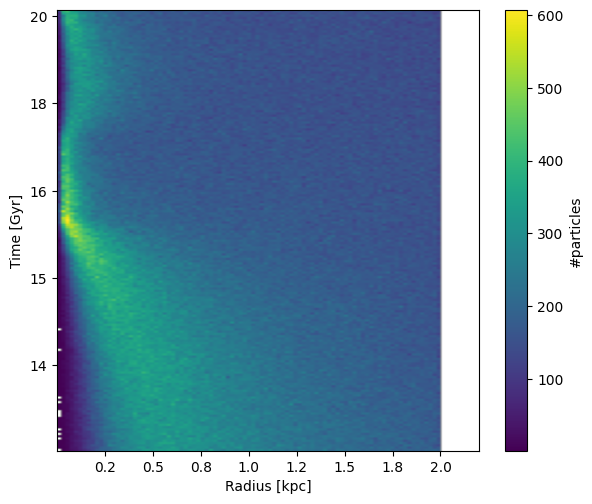

In [17]:
data['output'] = (data.v_norm/(km/second))**2
time_units={'name':'Gyr','value':Gyr}
length_units={'name':'kpc','value':kpc}
grid,extent = halo.prep_2d_data(data,radius_range=(0,2*kpc),time_range=(12*Gyr,20*Gyr),x_units=length_units,time_units=time_units,agg_fn='count')

utils.plot_2d(grid,extent=extent,x_units=length_units,y_units=time_units,xlabel='Radius [{name}]',ylabel='Time [{name}]',cbar_label='#particles',
              x_nbins=10,x_tick_format='%.1f');

/home/rotembarnea/Documents/SIDM/pySIDM/src/halo.py:293: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  agg_data = pd.concat([agg_data,pad]).drop_duplicates(['time','bin']).sort_values(['time','bin'])


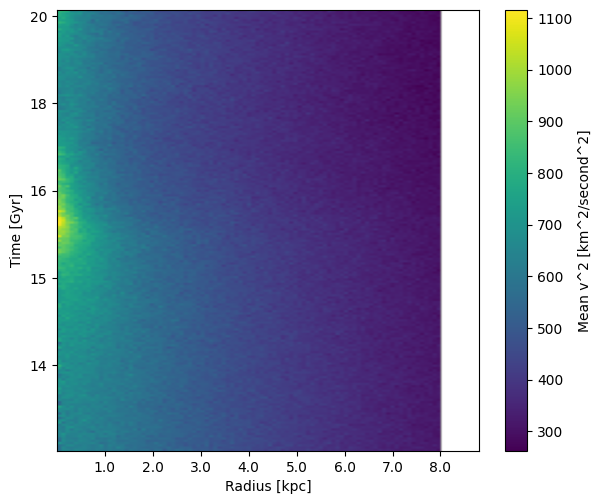

In [26]:
data['output'] = (data.v_norm/(km/second))**2
time_units={'name':'Gyr','value':Gyr}
length_units={'name':'kpc','value':kpc}
grid,extent = halo.prep_2d_data(data,radius_range=(0,8*kpc),x_units=length_units,time_units=time_units,agg_fn='mean')

utils.plot_2d(grid,extent=extent,x_units=length_units,y_units=time_units,xlabel='Radius [{name}]',ylabel='Time [{name}]',
              cbar_label='Mean v^2 [km^2/second^2]');

In [68]:
data = nsphere.load_all_files(base_filename='Rank_Mass_Rad_VRad_unsorted',ntimesteps=12525000,tfinal=1100,
                              max_time=19.605*Gyr,root_path='../../NSphere-SIDM/data')
data['v^2'] = data['Vrad']**2+(data['L']/data['R'])**2
data['time'] /= Gyr

Load files: 100%|███████████████████████████████████████████████████████| 501/501 [00:02<00:00, 212.54it/s]


In [72]:
data['Etot'] = data['E'] + data['PsiA']

In [ ]:
agg_data_E = data.groupby('time').E.agg('sum')
agg_data_Etot = data.groupby('time').E_tot.agg('sum')
agg_data_v2 = data.groupby('time')['v^2'].agg('sum')

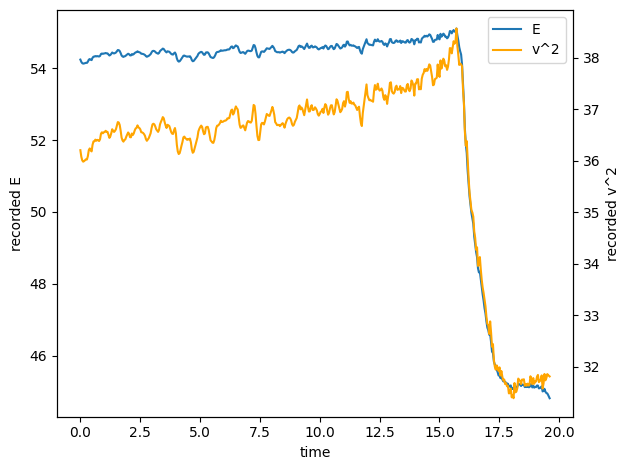

In [70]:
fig,ax1 = plt.subplots()
ax = sns.lineplot(agg_data_E,label='E')
ax1.set_ylabel('recorded E')
ax1.tick_params(axis='y')

ax2 = ax1.twinx()
sns.lineplot(data=agg_data_v2,ax=ax2,color='orange',label='v^2')
ax2.set_ylabel('recorded v^2')
ax2.tick_params(axis='y')

# Combine legends
lines1, labels1 = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax1.get_legend().remove()
ax2.get_legend().remove()
ax1.legend(lines1 + lines2, ['E', 'v^2'], loc='upper right')

# Add title and show
plt.tight_layout()

## Background uniform run

In [72]:
dt = dm_density.Tdyn / 1000
save_every_time = 10*dm_density.Tdyn
hard_save = True
save_path = 'run background uniform'

r, v = np.meshgrid(Quantity(np.linspace(1e-2, 50, 200), 'kpc'),Quantity(np.linspace(5, 100, 200), 'km/second'))
r, v = r.ravel(), np.vstack(utils.split_3d(v.ravel())).T
m = Quantity(np.zeros(len(r)),'Msun')
particle_type = ['baryon']*len(m)
halo = Halo(dt=dt,r=r,v=v,m=m,particle_type=particle_type,Tdyn=dm_density.Tdyn,
        background=Mass_Distribution.from_files(Mtot=dm_Mtot,base_filename='Rank_Mass_Rad_VRad_unsorted',ntimesteps=12525000,tfinal=1100,
                                                max_time=Quantity(19.605,'Gyr'),root_path='../../NSphere-SIDM/data/SIDM run'),
        save_every_time=save_every_time,hard_save=hard_save,save_path=save_path)

Load files: 100%|██████████████████████████████████████████████████████| 501/501 [00:00<00:00, 1114.20it/s]


In [ ]:
halo.evolve(until_t=Quantity(16,'Gyr'))

# Initial distributions:

In [ ]:
halo.plot_densities_rho();

In [ ]:
fig,ax = halo.plot_distribution('v_norm',halo.initial_particles,figsize=(10,6),filter_particle_type='baryon')
fig,ax = halo.plot_distribution('v_norm',halo.initial_particles,figsize=(10,6),filter_particle_type='dm')
fig,ax = halo.plot_r_distribution(halo.initial_particles,figsize=(10,6),filter_particle_type='baryon',add_density=1)
fig,ax = halo.plot_r_distribution(halo.initial_particles,figsize=(10,6),filter_particle_type='dm',add_density=0)

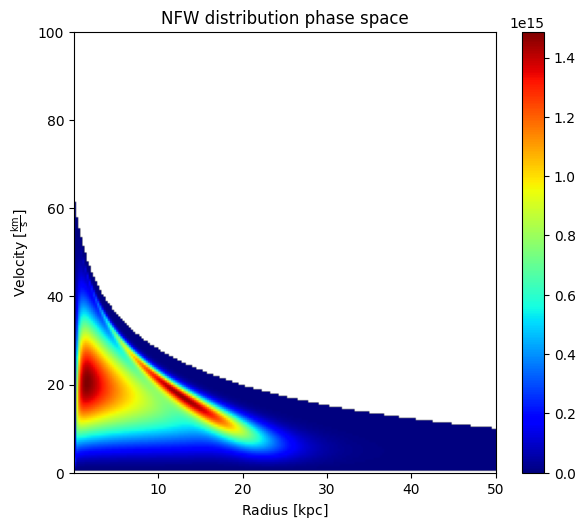

In [8]:
halo.densities[0].plot_phase_space(title='NFW distribution phase space');

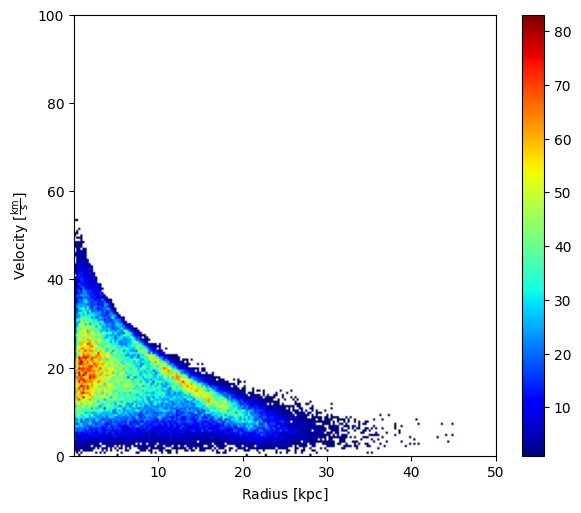

In [7]:
halo.plot_phase_space(halo.initial_particles);

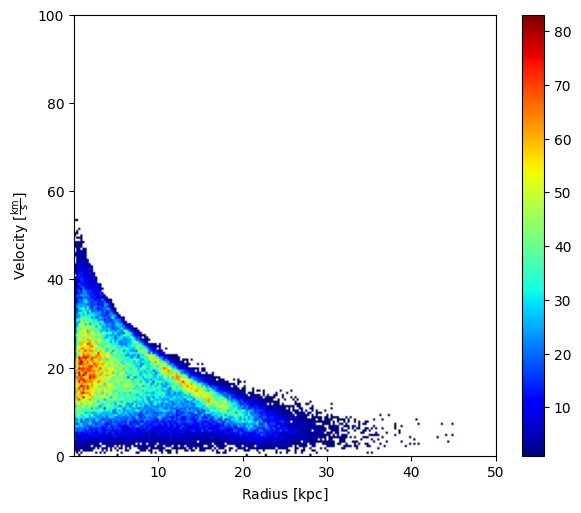

In [7]:
from matplotlib import colors
halo.plot_phase_space_evolution(save_path='../../phase space NFW.gif',frame_plot_kwargs={'norm':colors.Normalize(0,100)});

## Compare with NSphere:

In [9]:
nsphere_all_data = nsphere.load_all_files(base_filename='Rank_Mass_Rad_VRad_unsorted',ntimesteps=12525000,tfinal=1100,max_time=Quantity(19.605,'Gyr'),
                                          root_path='../../NSphere-SIDM/data/NO SIDM run')
nsphere_all_data['vp'] = nsphere_all_data['L']/nsphere_all_data['R']
nsphere_all_data['v_norm'] = np.sqrt(nsphere_all_data['vp']**2+nsphere_all_data['Vrad']**2)
nsphere_all_data['T'] = 1/2*nsphere_all_data['v_norm']**2
nsphere_all_data['particle_index'] = np.hstack([np.arange(100000)]*501)
nsphere_all_data = nsphere_all_data.rename(columns={'R':'r','Vrad':'vr'})
nsphere_initial_data = nsphere_all_data[nsphere_all_data['time'] == nsphere_all_data['time'].min()].copy().sort_values('R')

Load files: 100%|███████████████████████████████████████████████████████| 501/501 [00:02<00:00, 236.68it/s]


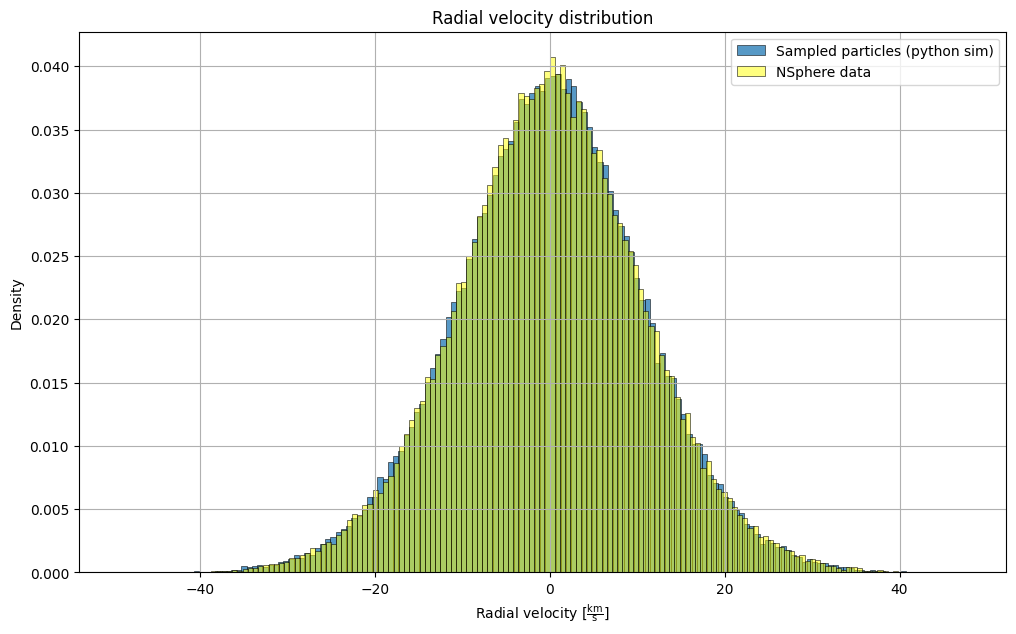

In [13]:
data = Quantity(nsphere_initial_data['vr'],'kpc/Myr').to('km/second')
fig,ax = halo.plot_distribution('vr',halo.initial_particles,figsize=(10,6),label='Sampled particles (python sim)')
sns.histplot(data,ax=ax,color='yellow',label='NSphere data',stat='density',alpha=0.5)

ax.legend()